[-7.00000063e-01  1.00000015e+00  4.77899102e-10 -2.98023224e-08
 -1.40957447e-10  1.86264515e-09  6.00000000e-01  1.19209290e-07
  2.78158448e-10 -5.58793545e-09 -5.03380575e-11  3.49245965e-10]


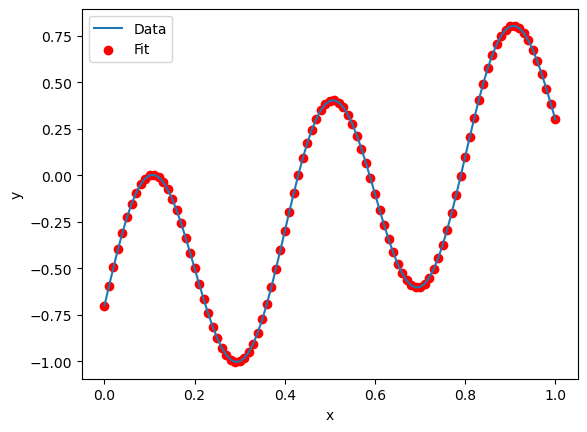

The coefficients are:
coeff of x^0 = -0.700000062584877
coeff of x^1 = 1.000000149011612
coeff of sin_pi5x = 0.6000000000065864


In [1]:
# problem2.txt and dump it in a numpy array.
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
f = np.loadtxt('problem2.txt')

poly_factors = 2
sin_factors = 5
cosine_factors = 5

P = np.zeros((poly_factors + sin_factors + cosine_factors, poly_factors + sin_factors + cosine_factors))

def phi_poly(i, x):
    return x**i

def phi_sin(i, x):
    return np.sin(np.pi*(i+1)*x)

def phi_cos(i, x):
    return np.cos(np.pi*(i+1)*x)


def P_matrix(x):
    for i in range(poly_factors + sin_factors + cosine_factors):
        for j in range(poly_factors + sin_factors + cosine_factors):
            if i < poly_factors:
                phi = phi_poly(i, x)
            elif i < poly_factors + sin_factors:
                phi = phi_sin(i - poly_factors, x)
            else:
                phi = phi_cos(i - poly_factors - sin_factors, x)
            
            if j < poly_factors:
                phi_ = phi_poly(j, x)
            elif j < poly_factors + sin_factors:
                phi_ = phi_sin(j - poly_factors, x)
            else:
                phi_ = phi_cos(j - poly_factors - sin_factors, x)
            P[i,j] = np.sum(phi*phi_)
    return P

def Q_vector(x, y):
    Q = np.zeros(poly_factors + sin_factors + cosine_factors)
    for i in range(poly_factors + sin_factors + cosine_factors):
        if i < poly_factors:
            phi = phi_poly(i, x)
        elif i < poly_factors + sin_factors:
            phi = phi_sin(i - poly_factors, x)
        else:
            phi = phi_cos(i - poly_factors - sin_factors, x)
        Q[i] = np.sum(y*phi)
    return Q

P = P_matrix(x)
Q = Q_vector(x, f)

C = np.linalg.pinv(P)@Q

print(C)
y_ = np.zeros(len(x))
for i in range(poly_factors + sin_factors + cosine_factors):
    if i < poly_factors:
        phi = phi_poly(i, x)
    elif i < poly_factors + sin_factors:
        phi = phi_sin(i - poly_factors, x)
    else:
        phi = phi_cos(i - poly_factors - sin_factors, x)
    y_ += C[i]*phi

# plot the data
plt.plot(x, f, label='Data')

# plot the estimate as scatter plot
plt.scatter(x, y_, label='Fit', color='red')

# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# print the coeefficients with the function
print('The coefficients are:')
for i in range(poly_factors + sin_factors + cosine_factors):
    if np.abs(C[i]) < 1e-2:
        continue
    if i < poly_factors:
        print(f'coeff of x^{i} = {C[i]}')
    elif i < poly_factors + sin_factors:
        print(f'coeff of sin_pi{i+1-poly_factors}x = {C[i]}')
    else:
        print(f'coeff of cos_pi{i+1-poly_factors}x = {C[i]}')